In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.power as smp
import statsmodels.stats.proportion as smprop

### Exercise I

A population is exponentially distributed with rate $\lambda = 2$. 

**Question I.1**

Which of the following statements is true?

1. The probability of obtaining an observation between 1 and 2 in a random draw can be calculated in Python by `expon.cdf(1, scale=1/2) - expon.cdf(2, scale=1/2)`
2. The probability of obtaining an observation below 1 in a random draw can be calculated in Python by `expon.cdf(2, scale=1/2)`
3. The probability of obtaining an observation below 1 in a random draw can be calculated in Python by `1 - expon.cdf(1, scale=1/2)`
4. The probability of obtaining an observation above 3 in a random draw can be calculated in Python by `expon.pdf(3, scale=1/2)`
5. **None of the above statements are correct.**

**Facit** <br>
The four answers are wrong:
1. It is the wrong order of subtraction, so a negative probability
2. It’s below 2
3. It’s the prbability when observation is above 1
4. It’s the probability density function at 3

**Question I.2**

According to the central limit theorem (CLT), what type of distribution approximates the mean of a random sample with $n = 100$ observations from the population?

1. The standard normal distribution
2. **A normal distribution (that is not also a standard normal distribution)**
3. An exponential distribution
4. A Poisson distribution
5. An F-distribution

**Facit** <br>

The **Central Limit Theorem (CLT)** states that the sampling distribution of the sample mean will approximate a **normal distribution**, regardless of the population's original distribution, as long as the sample size is sufficiently large. 

For a sample size of $ n = 100 $, the CLT implies:

1. The sample mean will approximately follow a **normal distribution**, even if the population distribution is not normal.
2. This approximation improves as $ n $ increases. For $ n = 100 $, which is relatively large, the approximation is expected to be very accurate.

*Key Points:*
- The CLT applies to the sampling distribution of the mean, not the individual data points.
- The population's distribution does not have to be normal for the sample mean to approximate a normal distribution.
- The sample size $ n = 100 $ is "large enough" for the CLT to hold well in most cases, making the normal approximation valid.

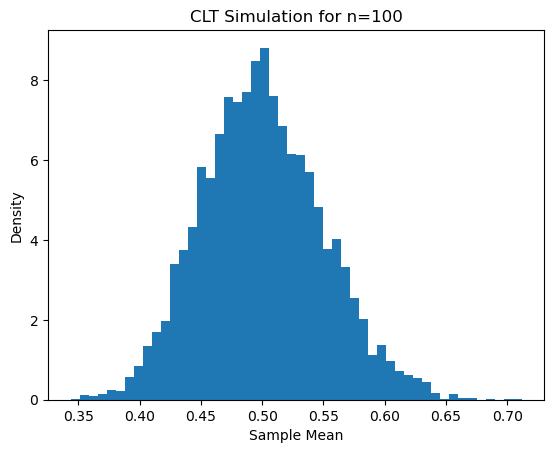

In [ ]:
# For 5000 means, each calculated from 100 data from exponential distribution, the histogram shows normal distribution of the sample means. 
import numpy as np
import matplotlib.pyplot as plt

# Simulation for illustration
n = 100
means = [np.mean(np.random.exponential(1/2, n)) for _ in range(5000)]
plt.hist(means, bins=50, density=True)
plt.title("CLT Simulation for n=100")
plt.xlabel("Sample Mean")
plt.ylabel("Density")
plt.show()

### Exercise II

A one-way ANOVA model has been fitted to some data from a balanced experiment (an equal number of observations for each treatment). The ANOVA table from the analysis is given below, where some numbers are replaced by letters.

| Source     | DF | SS  | MS   | Test Statistic | p-value |
|------------|----|------|------|----------------|---------|
| Treatment  | 9  | 207  | D    | E              | 0.03    |
| Residual   | 50 | B    | C    |                |         |
| Total      | A  | 707  |      |                |         |

**Question II.1 (3)**  

Which set of values is consistent with the ANOVA table?  

1  □ $ A = 59 $, $ B = 914 $, and $ D = 23 $  
2* □ $ A = 59 $, $ C = 10 $, and $ E = 2.3 $  
3  □ $ A = 450 $, $ D = 23 $, and $ E = 2.3 $  
4  □ $ B = 500 $, $ C = 23 $, and $ D = 10 $  
5  □ $ B = 914 $, $ C = 10 $, and $ E = 23 $  

**Facit**

Consider the following Table shown in Chapter 8

**ANOVA Table**

| **Source of Variation** | **Degrees of Freedom** | **Sums of Squares**       | **Mean Sum of Squares**                                                                                   | **Test Statistic $ F $**                                       | **p-value**                           |
|--------------------------|------------------------|---------------------------|-----------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------|---------------------------------------|
| Treatment               | $ k - 1 $           | $ SS(\text{Tr}) $       | $ MS(\text{Tr}) = \frac{SS(\text{Tr})}{k - 1} $                                                        | $ F_{\text{obs}} = \frac{MS(\text{Tr})}{MSE} $                | $ P(F > F_{\text{obs}}) $           |
| Residual                | $ n - k $           | $ SSE $                 | $ MSE = \frac{SSE}{n - k} $                                                                             |                                                                   |                                       |
| Total                   | $ n - 1 $           | $ SST $                 |                                                                                                           |                                                                   |                                       |

This structure outlines the ANOVA decomposition for balanced data. It includes the degrees of freedom (DF), sums of squares (SS), mean sums of squares (MS), F-test statistic, and the p-value.


The missing values are calculated as  

$A = 50 + 9 = 59, $ <br>
$B = 707 - 207 = 500, $ <br>
$C = \frac{B}{50} = \frac{500}{50} = 10$, <br>
$D = \frac{207}{9} = 23,$ <br> 
$E = \frac{D}{C} = \frac{23}{10} = 2.3$
  

Therefore, answer 2 is correct.

**Question II.2 (4)**

Two specific treatments are then compared in the post hoc analysis. What is the least significant difference between the two treatment means using a 5% significance level?  

1 □ 2.841  
2 □ 3.060  
3 □ 3.199  
4* □ 3.667  
5 □ 4.130  

**Facit**

*Remark 8.13 Least Significant Difference (LSD) values*

If there is the same number of observations in each treatment group $ m = n_1 = \dots = n_k $, the LSD value for a particular significance level  

$ LSD_\alpha = t_{1-\alpha/2} \sqrt{2 \cdot \frac{MSE}{m}} $ 

will have the same value for all the possible comparisons made.  

Since there are $ n = 60 $ observations across the $ k = 10 $ treatments and the experiment is balanced, there are $ m = 6 $ observations for each treatment. Thus,  

$LSD_{0.05} = t_{0.975}(50) \sqrt{2 \cdot \frac{10}{6}} = 3.667,$ 

which means answer 4 is correct.  

The formula from remark 8.13 is used:

$
LSD_\alpha = t_{1-\alpha/2}(n-k)\sqrt{\frac{2 \cdot MSE}{m}}.
$

Since there are \(n = 60\) observations across the \(k = 10\) treatments and the experiment is balanced, there are \(m = 6\) observations for each treatment. Thus,

$
LSD_{0.05} = t_{0.975}(50)\sqrt{\frac{2 \cdot 10}{6}} = 3.667,
$

which means answer 4 is correct.

### Exercise III

Temperature in the indoor environment is an important part of people’s well-being, and in addition, heating is an important part of the energy consumption in houses.

A house owner is considering the indoor temperature in one of the rooms of his house. As a first approach, he decides to analyze the daily average temperature in the room over a period of time. The Python output from his analysis is given below (the variable `temp` contains the daily average temperatures in the room).

---

**Python Output:**

```plaintext
One Sample t-test

data: temp
t = 160.53, df = 233, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 19.97593 20.47234
sample estimates:
mean of x:
 20.22413



**Question III.1 (5)**  

How many days did the house owner use for the analysis?  

1 □ 366  
2 □ 364  
3* □ 234  
4 □ 365  
5 □ 233  

**Facit**

Degrees of freedom is equal n − 1 and hence n = 233 + 1 = 234 days included.


In [10]:
se = (20.22413-20)/160.53
se


0.0013961876284806505

In [ ]:
###Incomplete.....

import scipy.stats as stats

# Define the parameters
mean_diff = 20.22413 - 20  # Difference between the sample mean and the hypothesized mean
se = mean_diff / 160.53  # Standard error (example value, replace with actual calculation if needed)
df = 233  # Degrees of freedom

# Calculate the two-tailed p-value
p_value = 2 * (1 - stats.t.cdf(mean_diff / se, df=df))

# Display the result
print(f"The p-value is: {p_value:.4f}")


The p-value is: 0.0000


### Question III.4 (8)

Suppose we instead had used the (unprovided) test statistic $ Q $ for testing if there is a significant temperature difference between the two months. What are the critical values using a significance level $ \alpha = 0.01 $?  

1 □ ±1.832  
2 □ ±1.960  
3 □ ±2.005  
4 □ ±2.398  
5*□ ±2.671  

**Facit**

In [15]:
from scipy.stats import t

# Calculate the critical t-value
critical_value = t.ppf(q= 0.995, df= 53.627)

# Display the result
print(f"The critical_value is: {critical_value:.3f}")

The critical_value is: 2.671


### Exercise IV

An energy trading company wants to learn about the electricity price in a particular area for a particular period. They download data from the market and calculate the daily electricity price and relevant weather variables. The following variables are in the data set:

- **Price**: the electricity price in the market  
- **Cloudcover**: cloud cover (in %)  
- **Humid**: relative humidity  
- **Temperature**: temperature  
- **Windspeed**: wind speed  

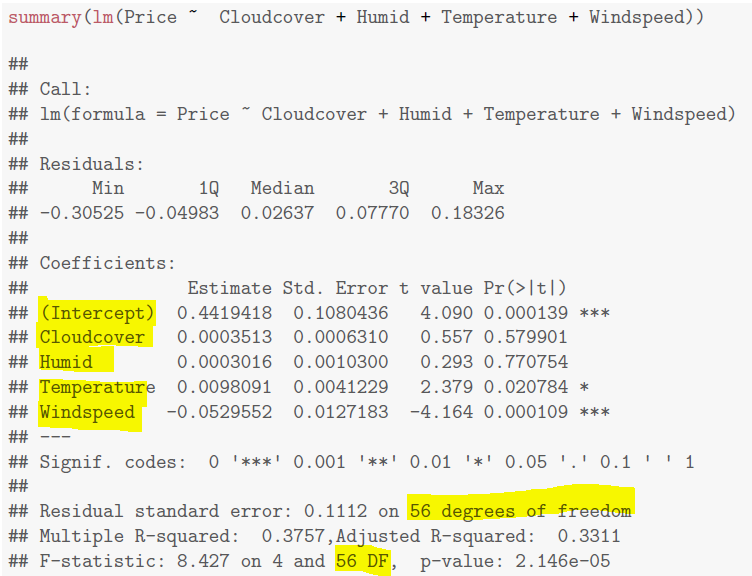


### Question IV.1 (10)

**How many days are included in the data set?**

1 □ 51  
2 □ 55  
3 □ 56  
4 □ 57  
5* □ 61  

**Facit**

The number of observations is equal to the degrees of freedom plus the number of parameters
in the model.


### Exercise V
This exercise contains questions related to supermarkets.  

**Question V.1 (13)**  
Back in the days, the cashiers in the supermarket entered the prices manually on the cash register. When employees were tired, they would often make errors when entering the prices. Assume that for a particular situation, they randomly made a price error for 5% of the customers. Assume independence of the price enterings.  

What is the probability that 10 or more out of 100 customers would experience a price error?  

Options:  
1 □ 0.0015  
2 □ 0.0043  
3* □ 0.028  
4 □ 0.063  
5 □ 0.55

**Facit**

In [ ]:
### Python Code:
from scipy.stats import binom

# Calculate probability
probability = 1 - binom.cdf(k=9, n=100, p=0.05)
print(f"The probability that 10 or more out of 100 customers would experience a price error: {probability:.3f}")

# k (9): This is the maximum number of "successes" (price errors in this context) 
# for which the CDF is calculated. The function calculates the probability of observing k or fewer successes.
# n (100): This is the total number of trials (in this case, the total number of customers).
# p (0.05): This is the probability of success (making a price error) in a single trial.

The probability that 10 or more out of 100 customers would experience a price error: 0.028


### Question V.2 (14)

In a study of a supermarket, the arrival rate of customers is assumed to be 200 customers/hour in the peak hours. Customers arrive according to a Poisson process. If more than 250 customers arrive in an hour, the store’s capacity will be exceeded. 

**What is the probability that the store’s capacity is *not* exceeded during a peak hour?**

1 □ 0.00028  
2 □ 0.00061  
3 □ 0.51879  
4 □ 0.92470  
5* □ 0.99972  

In [9]:
import scipy.stats as stats
from scipy.stats import poisson

# Parameters
arrival_rate = 200  # average arrivals per hour
capacity = 250      # maximum capacity

# Calculate the probability that the number of arrivals is within the capacity (<= 250)
probability_within_capacity = poisson.cdf(capacity, arrival_rate)

# Display the result
print(f"The probability that the store's capacity is not exceeded during a peak hour is: {probability_within_capacity:.5f}")


The probability that the store's capacity is not exceeded during a peak hour is: 0.99972


### Question VI.1 (16)


In [ ]:
import numpy as np

# Parameters
rate_x = 1.2
rate_y = 1.7
n_samples = 1000000

# Generate random samples
x = np.random.exponential(scale=1/rate_x, size=n_samples)
y = np.random.exponential(scale=1/rate_y, size=n_samples)

# Calculate the proportion where x + y > 3
proportion = np.mean((x + y) > 3)

# Display the result
print(f"The proportion of x + y > 3 is: {proportion:.3f}")


The proportion of x + y > 3 is: 0.078


### Question VII.2 (18)
Which of the following calls in Python calculates the width of the 99% confidence interval for β_0?

*1.□ 2 * t.ppf(0.995, 28) * 0.49844

2.□ 2 * t.ppf(0.995, 28) * 0.09284

3.□ t.ppf(0.995, 27) * 0.49844

4.□ t.ppf(0.95, 28) * 0.09284

5.□ t.ppf(0.99, 28) * 0.43369


### Exercise IX
As part of a study on adaptive learning platforms, 47 students volunteered to try a new teaching method for the entire semester. The students' performances were tested by a pretest before the semester and a posttest after the semester.

Pretest scores are stored in pretest and posttest scores are stored in posttest. Both are ordered by student number.

### Question IX.1 (21)

the following code was run:

In [4]:
import numpy as np

# Assuming `pretest` is a numpy array or list
pretest = np.array([your_pretest_scores_here])  # Replace with actual scores

# Sum of pretest scores
pretest_sum = np.sum(pretest)
print("Sum of pretest:", pretest_sum)

# Quantiles (25th, 50th, 75th percentile)
quantiles = np.percentile(pretest, [25, 50, 75])
print("25%:", quantiles[0])
print("50%:", quantiles[1])
print("75%:", quantiles[2])


NameError: name 'your_pretest_scores_here' is not defined

Here is the content from the image:

---

Which of the following statements can be concluded about the pretest scores:

1. ☐ The mean of the pretest scores is 30  
2. ☐ The median of the pretest scores is 34.5  
*3. ☐ The IQR of the pretest scores is 36.7  
4. ☐ The standard deviation of the pretest scores is 16.7  
5. ☐ None of the above

The IQR of a sample is \( q_{0.75} - q_{0.25} \), which in this case is 36.7 when rounded.

### Question IX.2 (22)

We wish to compare the students' pretest and posttest performances by using the mean change in test scores (posttest minus pretest) as a target.

Which of the following code snippets correctly computes a 95% confidence interval for this quantity using non-parametric bootstrapping?


1

In [ ]:
import numpy as np

# Simulating mean differences between two samples
sim_mean_diff = [
    np.mean(np.random.choice(posttest, 20, replace=True)) -
    np.mean(np.random.choice(pretest, 20, replace=True))
    for _ in range(1000)
]

# Calculating the 2.5th and 97.5th percentiles
quantiles = np.percentile(sim_mean_diff, [2.5, 97.5])
print("95% CI for simulated mean differences:", quantiles)

*2

In [ ]:
# Simulating mean differences of paired differences
sim_mean_diff = [
    np.mean(np.random.choice(posttest - pretest, 20, replace=True))
    for _ in range(1000)
]

# Calculating the 2.5th and 97.5th percentiles
quantiles = np.percentile(sim_mean_diff, [2.5, 97.5])
print("95% CI for paired simulated mean differences:", quantiles)

3

In [ ]:
import scipy.stats as stats

# Two-sample t-test (unpaired)
t_stat, p_val = stats.ttest_ind(posttest, pretest, equal_var=False)
print("Unpaired t-test:", t_stat, p_val)
# Note: Confidence intervals for t-tests with SciPy require additional calculations.

4

In [ ]:
# Paired t-test
t_stat, p_val = stats.ttest_rel(posttest, pretest)
print("Paired t-test:", t_stat, p_val)
# Note: SciPy does not provide confidence intervals directly for t-tests.

5

In [ ]:
# Paired t-test with a modified confidence level (e.g., 97.5%)
# Use statsmodels to compute confidence intervals
import statsmodels.stats.api as sm

paired_diff = posttest - pretest
conf_int = sm.DescrStatsW(paired_diff).tconfint_mean(alpha=0.025)
print("95% CI for paired differences:", conf_int)

Snippets 3–5 use a t-test and hence do not use non-parametric bootstrap. The setup in this experiment is two samples, paired, which the second snippet does (the first snippet is an unpaired two-sample).

### Question IX.3 (23)
As a result of the previous question, the researchers got the confidence interval [7.9, 17.2]

Which of the following statements can be concluded?

*1. ☐ The mean posttest result is significantly higher than the mean pretest result on a 5% significance level  

2. ☐ The mean pretest result is significantly higher than the mean posttest result on a 5% significance level  

3. ☐ There is not a significant difference between the mean pretest and posttest results on a 5% significance level  

4. ☐ There is a linear relationship between pretest and posttest results  

5. ☐ None of the above  

### Exercise X
A hospital took blood samples from 469 randomly selected people of different age and screened the samples for a specfic chemical. The results of the screenings are given in Table 1 below:
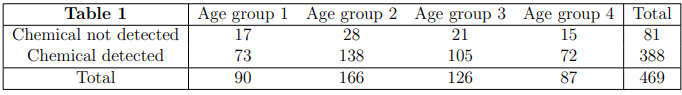

The data used to construct table 1 can be read into python using:

In [10]:
import numpy as np

# Define the data
data = [
    [17, 28, 21, 15],
    [73, 138, 105, 72]
]

# Add a "Total" column to each row
data_with_totals = [row + [sum(row)] for row in data]

# Convert to a 2D NumPy array
table1 = np.array(data_with_totals)

# Display the matrix
print("Table 1 with totals:")
print(table1)


Table 1 with totals:
[[ 17  28  21  15  81]
 [ 73 138 105  72 388]]


### Question X.1 (24)
Under the null hypothesis that the probablility of a sample having traces of the chemical is the same across the diferent age grous, what is the expected number of samples without traces of the chemical taken from people in age group 3?

1. ☐ 20.25  
*2. ☐ 21.76  
3. ☐ 26.30  
4. ☐ 28.67  
5. ☐ 104.24

The estimate of the common proportion of samples having traces of the chemical is found using (7-42) as:
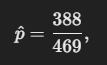

which implies that the expected number of samples without traces of the chemical is:
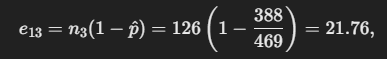

cf. (7-43). Answers 2 is therefore correct.

### Question X.2 (25)
which of the following is the correct conclusion when testing the null hypothesis that the porbability of a sample having traces of the chemical is the same across the different age groups at a 5% significance level (both the argument and the conclusion must be correct)?

☐ The 
𝑝-value is 0.025 and the null hypothesis is therefore rejected

☐ The 
𝑝-value is 0.025 and the null hypothesis is therefore accepted

☐ The 
𝑝
p-value is 0.975 and the null hypothesis is therefore rejected

#☐ The 
𝑝-value is 0.975 and the null hypothesis is therefore accepted

☐ The 
𝑝-value is 0.975 and the test is therefore inconclusive

Method 7.22 applies, which can be done in Python as:

In [12]:
import numpy as np
from scipy.stats import chi2_contingency

# Create the matrix
table1 = np.array([
    [17, 28, 21, 15],
    [73, 138, 105, 72]
])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(table1, correction=False)

# Display the results
print("Pearson's Chi-squared test")
print(f"Data: table1")
print(f"X-squared = {chi2:.5f}, df = {dof}, p-value = {p:.3f}")


Pearson's Chi-squared test
Data: table1
X-squared = 0.21606, df = 3, p-value = 0.975


Since the p-value is much larger than the chosen significance level, the null hypothesis is accepted. Hence, answer 4 is correct

### Exercise XII
The following times were recorded by the quarter-mile runners and mile runners of a university track team (times are in minutes). The observations are read into python by:

In [11]:
# Define the data in Python
quarter_mile_times = [0.92, 0.98, 1.04, 0.90, 0.99]
mile_times = [4.52, 4.35, 4.60, 4.70, 4.50]

# Display the data
print("Quarter-mile times:", quarter_mile_times)
print("Mile times:", mile_times)


Quarter-mile times: [0.92, 0.98, 1.04, 0.9, 0.99]
Mile times: [4.52, 4.35, 4.6, 4.7, 4.5]


After viewing this sample of running times, one of the coaches commented that the quarter-mile runners turned in more consistent times.

### Question XII.1 (28)

Calculate the standard deviation (s) and coefficient of variation (CV) to summarize the variability in the data.

1. ☐ Quarter-mile runners: \( s = 0.0564, \, CV = 0.0584 \)  
   Mile runners: \( s = 0.1295, \, CV = 0.0286 \)

2. ☐ Quarter-mile runners: \( s = 0.1295, \, CV = 0.0286 \)  
   Mile runners: \( s = 0.0564, \, CV = 0.0584 \)

3. ☐ Quarter-mile runners: \( s = 0.0413, \, CV = 0.0584 \)  
   Mile runners: \( s = 0.1295, \, CV = 0.0286 \)

4. ☐ Quarter-mile runners: \( s = 0.0564, \, CV = 0.0564 \)  
   Mile runners: \( s = 0.1295, \, CV = 0.0564 \)

5. ☐ Quarter-mile runners: \( s = 0.0564, \, CV = 0.0413 \)  
   Mile runners: \( s = 0.0584, \, CV = 0.0564 \)

See Definition 1.12 Coefficient of variation, Chapter 1, Page 14

In [13]:
import numpy as np

# Define the data
qmile = np.array([0.92, 0.98, 1.04, 0.90, 0.99])
mile = np.array([4.52, 4.35, 4.60, 4.70, 4.50])

# Calculate standard deviation and coefficient of variation (CV)
qmile_sd = np.std(qmile, ddof=1)  # Use ddof=1 for sample standard deviation
qmile_cv = qmile_sd / np.mean(qmile)

mile_sd = np.std(mile, ddof=1)
mile_cv = mile_sd / np.mean(mile)

# Round the results to 4 decimal places
print("Quarter-mile runners (s, CV):", round(qmile_sd, 4), round(qmile_cv, 4))
print("Mile runners (s, CV):", round(mile_sd, 4), round(mile_cv, 4))

Quarter-mile runners (s, CV): 0.0564 0.0584
Mile runners (s, CV): 0.1295 0.0286


### Exercise XIII
A sample of 12 of the top-rated hotels in the United States has the following number of rooms and cost per night for a double room (as read in python):

In [14]:
import numpy as np

# Define the data
rooms = np.array([220, 727, 285, 273, 145, 213, 398, 343, 250, 414, 400, 700])
cost = np.array([499, 340, 585, 495, 495, 279, 279, 455, 595, 367, 675, 420])

# Display the data
print("Rooms:", rooms)
print("Cost:", cost)

Rooms: [220 727 285 273 145 213 398 343 250 414 400 700]
Cost: [499 340 585 495 495 279 279 455 595 367 675 420]


### Question XIII.1 (29)

**What is the sample correlation coefficient \( r \)? What does it tell you about the relationship between the number of rooms and the cost per night for a double room?**

1. ☐ \( r = -0.293 \), a slight negative correlation. Higher cost per night tends to be associated with larger hotels.  

2. ☐ \( r = -0.493 \), a moderately negative correlation. Lower cost per night tends to be associated with larger hotels.  

3. ☐ \( r = -0.493 \), a moderately negative correlation. Higher cost per night tends to be associated with larger hotels.  

4. ☐ \( r = 0.791 \), a strong positive correlation. Higher cost per night tends to be associated with the larger hotels.  

*5. ☐ \( r = -0.293 \), a slight negative correlation. Lower cost per night tends to be associated with larger hotels.

In [15]:
import numpy as np

# Define the data
rooms = np.array([220, 727, 285, 273, 145, 213, 398, 343, 250, 414, 400, 700])
cost = np.array([499, 340, 585, 495, 495, 279, 279, 455, 595, 367, 675, 420])

# Calculate the correlation coefficient
correlation = np.corrcoef(rooms, cost)[0, 1]

# Round to 3 decimal places and display
print("Correlation coefficient (rounded):", round(correlation, 3))


Correlation coefficient (rounded): -0.293


### Exercise XIV
A sample was collected, and its summary statistics were calculated. The sample is:

**3, 6, 7, 0, 6, 13, 3, 7, 9, 15**

The summary statistics are (rounded to two decimals):

| Statistic       | Value |
|------------------|-------|
| $ \bar{x} $  | 6.9   |
| $ s $        | 4.56  |
| $ s^2 $      | 20.77 |
| Minimum         | 0     |
| $ Q_1 $      | 3.75  |
| Median          | 6.5   |
| $ Q_3 $      | 8.5   |
| Maximum         | 15    |
| $ n $        | 10    |

---

**Question XIV.1 (30):**  
However, we suspect that there is an error in one of the summary statistics. Which one?

1 □ $\bar{x}$ <br>
2 □ $ s^2 $ <br>
3 □ Median  <br>
4 □ $ Q_1 $ <br>
5* □ There are no errors in the summary statistics.

**Facit**

In [16]:
import numpy as np
import pandas as pd

# Data
x = [3, 6, 7, 0, 6, 13, 3, 7, 9, 15]

# Summary statistics
# mean_x = np.mean(x)
#std_dev_x = np.std(x, ddof=1)  # Sample standard deviation
variance_x = np.var(x, ddof=1)  # Sample variance
summary_x = pd.Series(x).describe()

# Print results
print("Mean:", mean_x)
#print("Standard Deviation:", std_dev_x)
print("Variance:", variance_x)
print("Summary:\n", summary_x)

NameError: name 'mean_x' is not defined